In [ ]:
import pandas as pd
df = pd.read_csv('/content/TSLA.csv')
print(df.head())


         Date      Open      High       Low     Close  Adj Close     Volume
0  2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500
1  2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
2  2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
3  2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
4  2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [ ]:
monthly_data = df['Close'].resample('M').mean()

<ipython-input-10-b926d47921c0>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df['Close'].resample('M').mean()


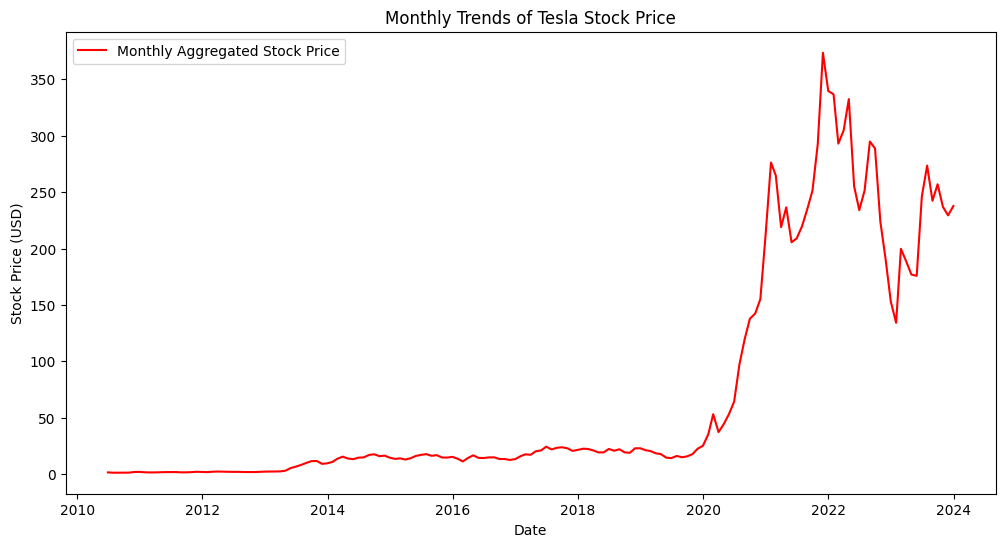

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(monthly_data, label='Monthly Aggregated Stock Price', color='red')
plt.title('Monthly Trends of Tesla Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()

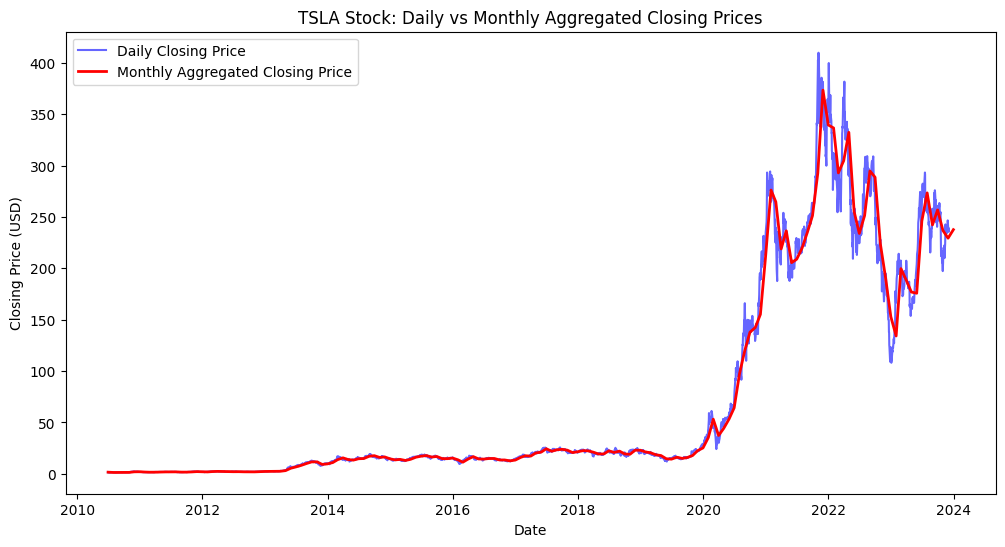

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Daily Closing Price', alpha=0.6, color='blue')
plt.plot(monthly_data, label='Monthly Aggregated Closing Price', color='red', linewidth=2)
plt.title('TSLA Stock: Daily vs Monthly Aggregated Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

In [ ]:
window_size = 3
monthly_data_sma = monthly_data.rolling(window=window_size).mean()

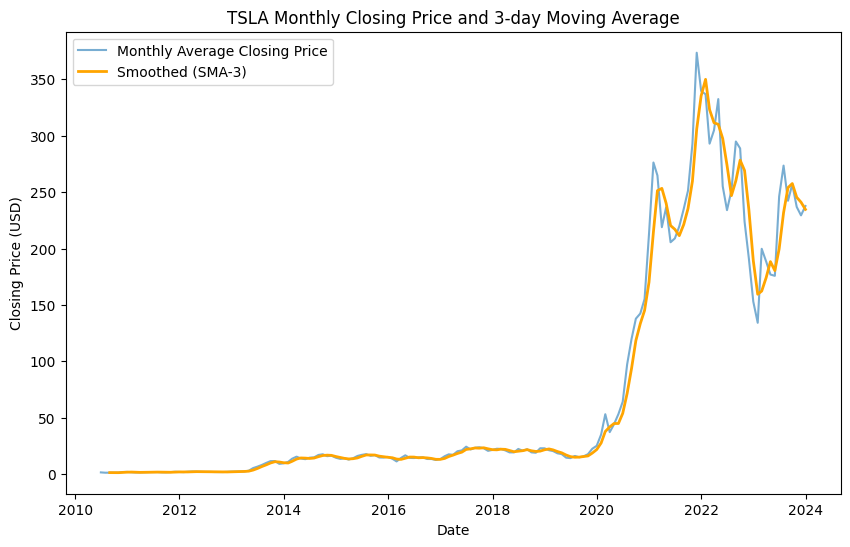

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_data, label='Monthly Average Closing Price', alpha=0.6)
plt.plot(monthly_data_sma, label=f'Smoothed (SMA-{window_size})', color='orange', linewidth=2)
plt.title(f'TSLA Monthly Closing Price and {window_size}-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(monthly_data, trend='add', seasonal=None, damped_trend=False)
fit_model = model.fit()

In [ ]:
monthly_data_smooth = fit_model.fittedvalues

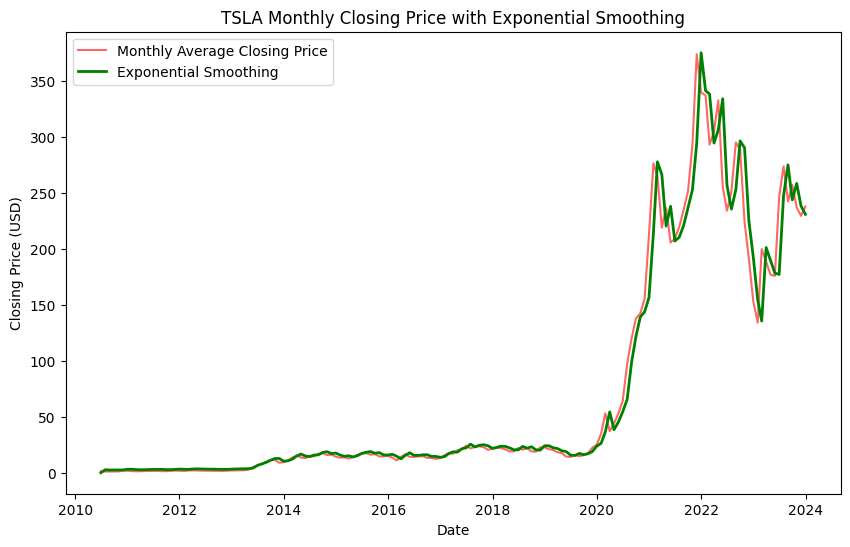

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_data, label='Monthly Average Closing Price', color='red', alpha=0.6)
plt.plot(monthly_data_smooth, label='Exponential Smoothing', color='green', linewidth=2)
plt.title('TSLA Monthly Closing Price with Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()